# K-Means Cluster

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn import metrics
from clustering_utils import *

## Load the Data

In [2]:
df = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    11508 non-null  object 
 1   lang                    11508 non-null  object 
 2   bot                     11508 non-null  int64  
 3   created_at              11508 non-null  object 
 4   statuses_count          11508 non-null  int64  
 5   avg_length              11508 non-null  float64
 6   avg_special_chars       11508 non-null  float64
 7   urls_ratio              11508 non-null  float64
 8   mentions_ratio          11508 non-null  float64
 9   hashtags_ratio          11508 non-null  float64
 10  reply_count_mean        11508 non-null  float64
 11  reply_count_std         11508 non-null  float64
 12  favorite_count_mean     11508 non-null  float64
 13  favorite_count_std      11508 non-null  float64
 14  favorite_count_entropy  1

loaded the data, we separate the numerical features (used to run the clustering algorithms) and the categorical ones (used to understand the results of the clustering algorithms)

In [4]:
# remove categorical features
cat_features = ["name", "lang", "bot", "created_at"]
df_cat = df[cat_features]
df_num = df.loc[:, ~df.columns.isin(cat_features)]

In [5]:
df_cat.head()

name lang  bot           created_at
2353593986   Lamonica Raborn   en    1  2019-02-22 18:00:42
2358850842     Lourie Botton   en    0  2019-02-26 03:02:32
137959629   Dadan Syarifudin   en    1  2015-04-30 07:09:56
466124818     Carletto Focia   it    1  2017-01-18 02:49:18
2571493866         MBK Ebook   en    0  2019-06-18 19:30:21

In [6]:
df_num.head()

statuses_count  avg_length  avg_special_chars  urls_ratio  \
2353593986              76   62.340909          14.015152    0.000000   
2358850842              54   69.082645          15.041322    0.000000   
137959629               53   65.340909          14.694444    0.000000   
466124818               50   86.944871          18.689463    0.022331   
2571493866            7085   72.311246          14.582073    0.000825   

            mentions_ratio  hashtags_ratio  reply_count_mean  reply_count_std  \
2353593986        0.272727        0.098485               0.0              0.0   
2358850842        0.338843        0.024793               0.0              0.0   
137959629         0.000000        0.000000               0.0              0.0   
466124818         0.006281        0.072575               0.0              0.0   
2571493866        0.506461        0.118229               0.0              0.0   

            favorite_count_mean  favorite_count_std  favorite_count_entropy  \
2353593986             0.037879            0.190903                0.232481   
2358850842             0.049587            0.217090                0.284639   
137959629              0.000000            0.000000                0.000000   
466124818              0.165387            0.530838                0.669155   
2571493866             0.056365            0.243387                0.317182   

            retweet_count_mean  retweet_count_std  
2353593986            0.037879           0.190903  
2358850842            0.024793           0.155495  
137959629             0.000000           0.000000  
466124818             0.826239          13.034008  
2571493866            0.016772           0.142619

## Preprocessing

First apply the log scale of the feature with a skewed distribution (see DataProfileUnderstanding.ipynb), following the results presented in data understanding of the profiling.

In [7]:
# TODO : Review the DataUnderstandingProfiling

skewed_features = [
    "statuses_count",
    "avg_special_chars",
    "urls_ratio",
    "mentions_ratio",
    "hashtags_ratio",
    "reply_count_mean",
    "reply_count_std",
    "favorite_count_mean",
    "favorite_count_std",
    "retweet_count_mean",
    "retweet_count_std"]

df_num_not_skewed = preprocess_skewed_features(df_num, skewed_features)

Apply Standard Scaling as preprocessing step

In [8]:
scaler = StandardScaler()

In [9]:
X = scaler.fit_transform(df_num_not_skewed.values)

Apply the k-means algorithm, for max_k iteration try different values of the K parameter, select out the best with respect to the SSE, Separation and Silouettes curves.

In [10]:
sse_list = list()
separations = list()
silouettes_ = list()

max_k = 25
for k in tqdm(range(2, max_k + 1)):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    separations.append(metrics.davies_bouldin_score(X, kmeans.labels_))
    silouettes_.append(silhouette_score(X, kmeans.labels_))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 24/24 [00:49<00:00,  2.05s/it]


Plotting SSE Curve

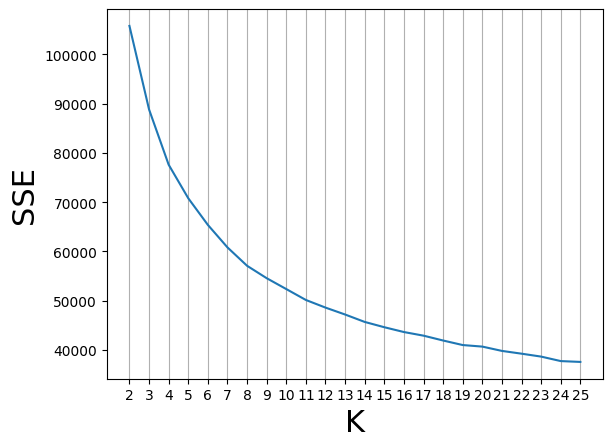

In [11]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(sse_list) + 2))
plt.grid(True, axis="x")
plt.savefig("images/clustering/kmeans_sse.png")
plt.show()

Plotting Separation Curve

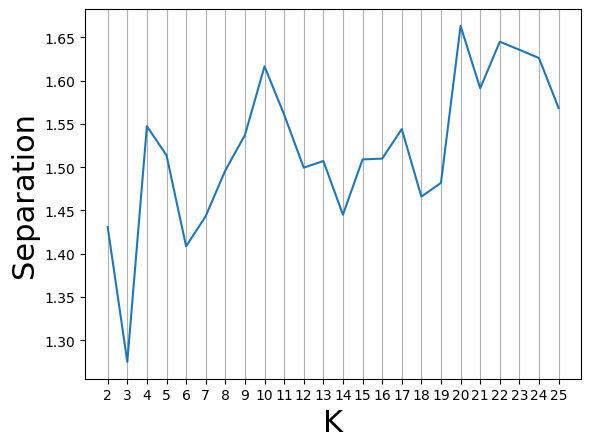

In [12]:
plt.plot(range(2, len(separations) + 2), separations)
plt.ylabel('Separation', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(separations) + 2))
plt.grid(True, axis="x")
plt.savefig("images/clustering/kmeans_separation.png")
plt.show()

Plotting Separation Curve

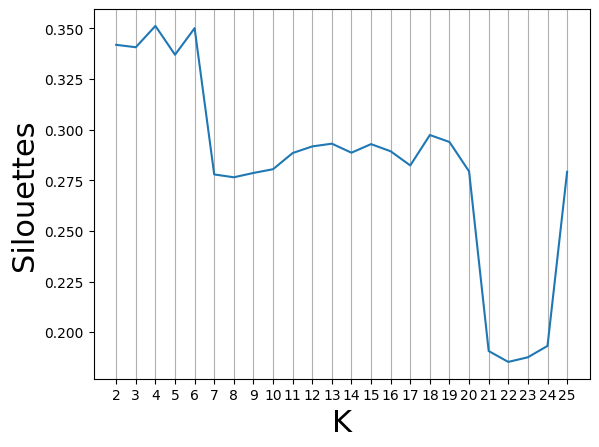

In [13]:
plt.plot(range(2, len(silouettes_) + 2), silouettes_)
plt.ylabel('Silouettes', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.xticks(range(2, len(silouettes_) + 2))
plt.grid(True, axis="x")
plt.savefig("images/clustering/kmeans_silouettes.png")
plt.show()

Select out the best K, chose it properly using the plotted curves, we want the K that try to maximize the silouette, minimizing the Separation and the SSE at the same time.

In [14]:
selected_k=6

Get the Kmeans clustering with selected K

In [15]:
kmeans = KMeans(n_clusters=selected_k, n_init=100, max_iter=500)
kmeans.fit(X)

KMeans(max_iter=500, n_clusters=6, n_init=100)

## Plot Cluster Results

Plot the centroids in a tabular way, to have a summary of the clusters

In [16]:
pd.DataFrame(kmeans.cluster_centers_, columns=df_num.columns)

statuses_count  avg_length  avg_special_chars  urls_ratio  mentions_ratio  \
0       -0.404035    1.469861           1.286643   -0.134221       -0.809206   
1        1.385013   -0.910500          -0.949276    0.378748        1.099221   
2        1.115875    0.955266           0.759720    1.577134        1.212671   
3       -0.585047   -0.393900          -0.171343   -0.165000       -0.988418   
4       -0.507115   -0.135854          -0.089793   -0.448085       -0.277684   
5       -0.636193   -0.336246          -0.120756   -0.113085       -0.947095   

   hashtags_ratio  reply_count_mean  reply_count_std  favorite_count_mean  \
0       -0.237594         -0.238314        -0.347041             0.822896   
1       -0.164385         -0.231479        -0.347221             1.011322   
2        0.798985         -0.243853        -0.339132             0.330089   
3        0.807909          3.738727         2.222591            -0.526021   
4       -0.268942         -0.245873        -0.345652            -0.448848   
5        0.739822         -0.229814         3.246611            -0.543931   

   favorite_count_std  favorite_count_entropy  retweet_count_mean  \
0            0.975551                0.874152            0.443388   
1            1.141767                1.197052            1.244270   
2            0.392258                0.331947            0.652360   
3           -0.571219               -0.702172           -0.550500   
4           -0.517080               -0.478132           -0.526893   
5           -0.672637               -0.739212           -0.541302   

   retweet_count_std  
0           0.531762  
1           1.300075  
2           1.376375  
3          -0.762398  
4          -0.690060  
5          -0.751508

In [17]:
# the centers values have the skewed distribution in log-scale
# get the centroids in the same space of the original data.
centers = reverse_log_skewed(scaler.inverse_transform(kmeans.cluster_centers_), df_num, skewed_features)

Plot the centroids coordinates in parallel and radar coordinates, we can see that the different centroids have values of the features that vary in the magnitude between different clusters, so each cluster represent a kind of behaviour different with respect the others.

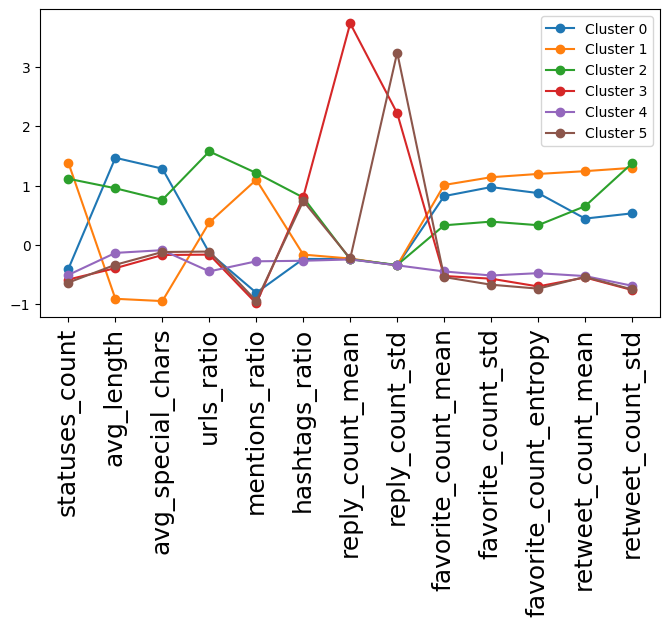

In [18]:
plot_parallel_coordinates_clusters(df_num, kmeans.cluster_centers_, "kmeans")

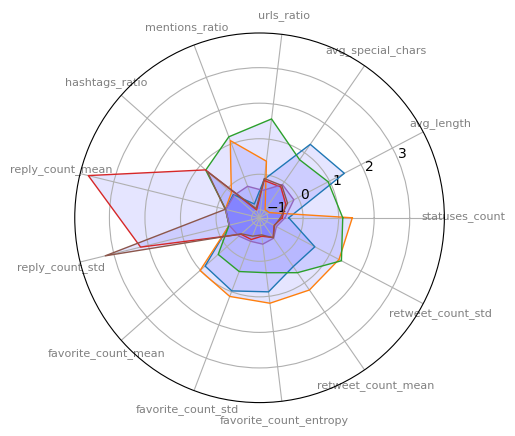

In [19]:
plot_radar_clusters(df_num, kmeans.cluster_centers_, "kmeans")

#### Distribution of CategoricalFeatures per Cluster

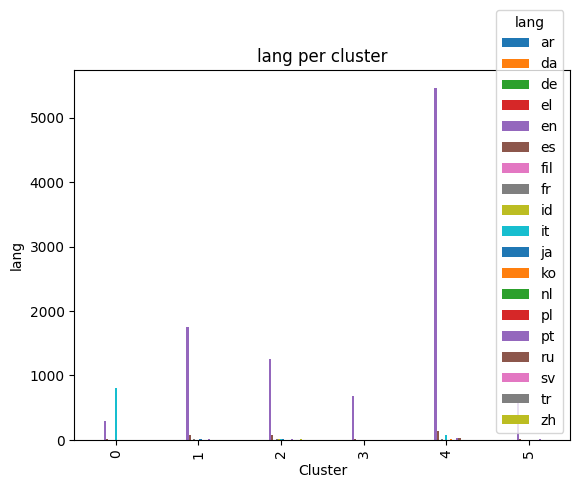

In [20]:
categorical_hist_clusters(df_cat, kmeans.labels_, "lang", "kmeans")

Plot the distribution of bot and non-bot user per cluster, we can see that each cluster have a majority of one of the two classes, this is a simptom of the goodness of the cluster method, and the utility of the selected indicator choosen to describe an user profile.

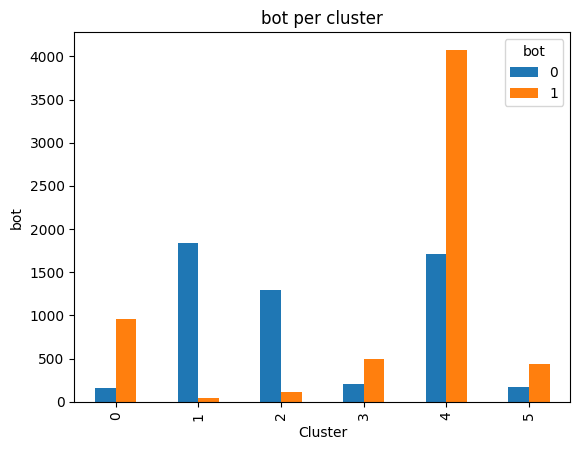

In [21]:
categorical_hist_clusters(df_cat, kmeans.labels_, "bot", "kmeans")

Plot of the **created_at** feature (grouped by year) of the user in each cluster

0
1120


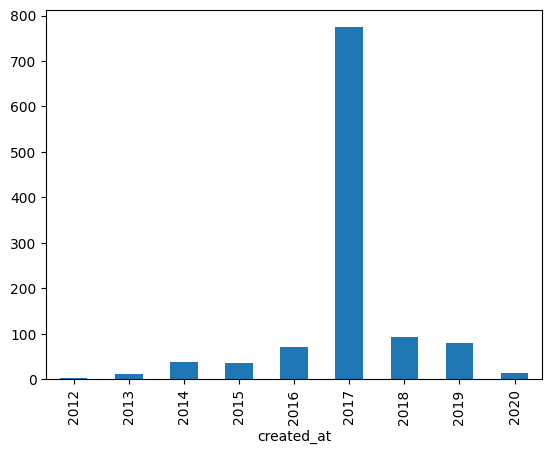

1
1890


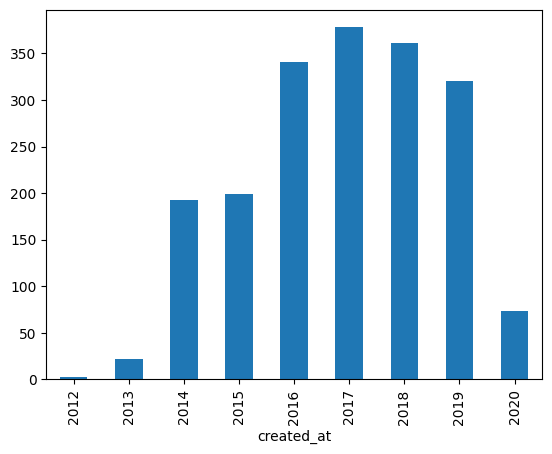

2
1403


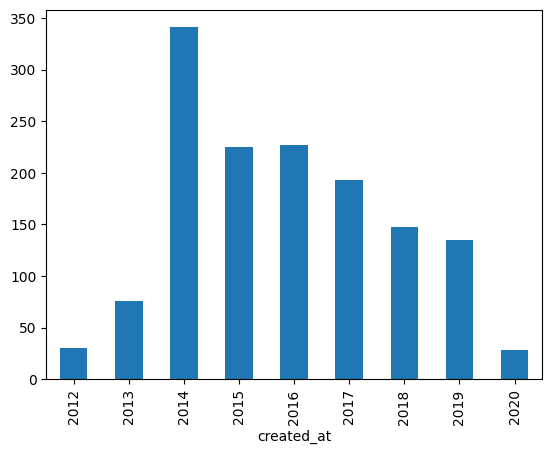

3
698


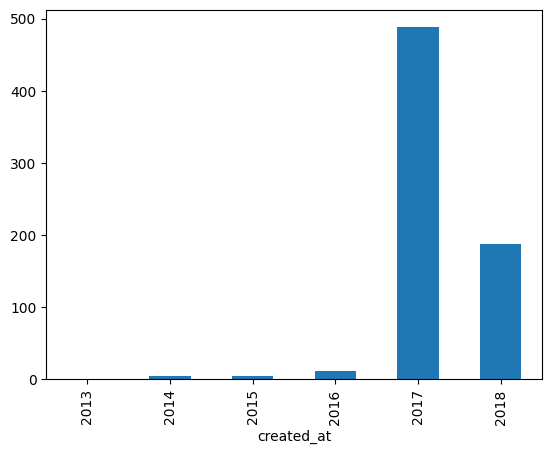

4
5790


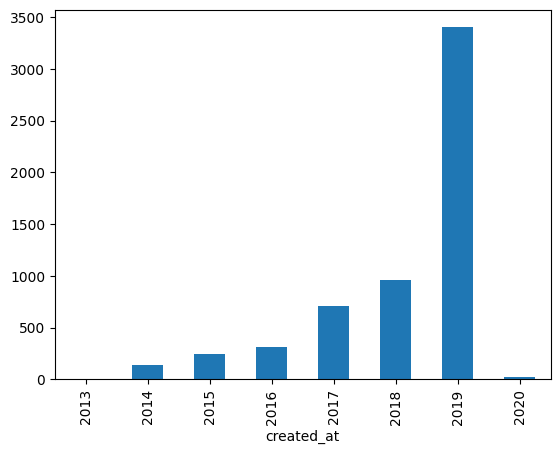

5
607


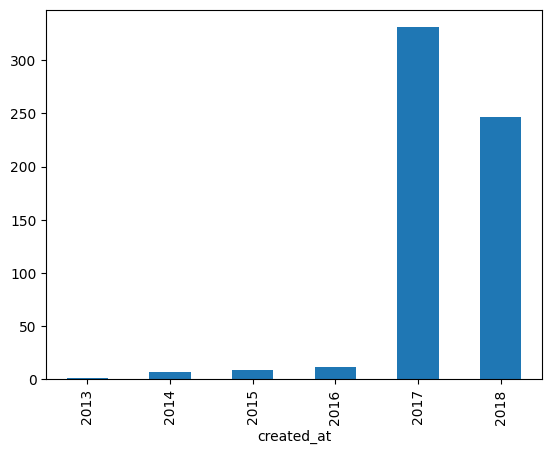

In [22]:
plot_date_feature_clusters(df_cat, kmeans.labels_, selected_k)

#### Distribution of Numerical Features per Cluster

We will plot the distribution of the variables in the original space, plotting the boxplots and histogram of each numerical feature for each discovered cluster.

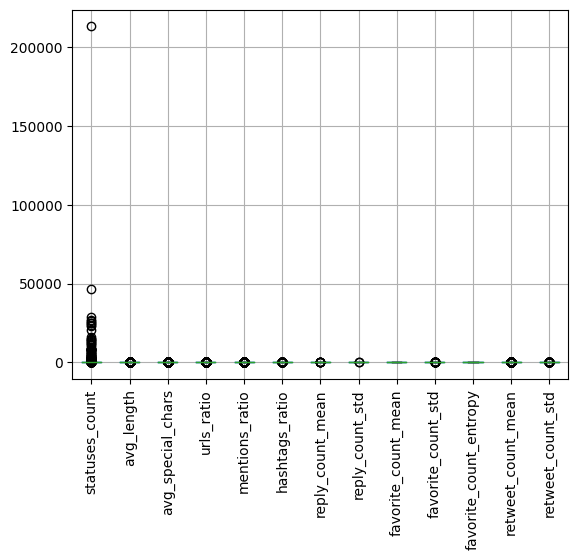

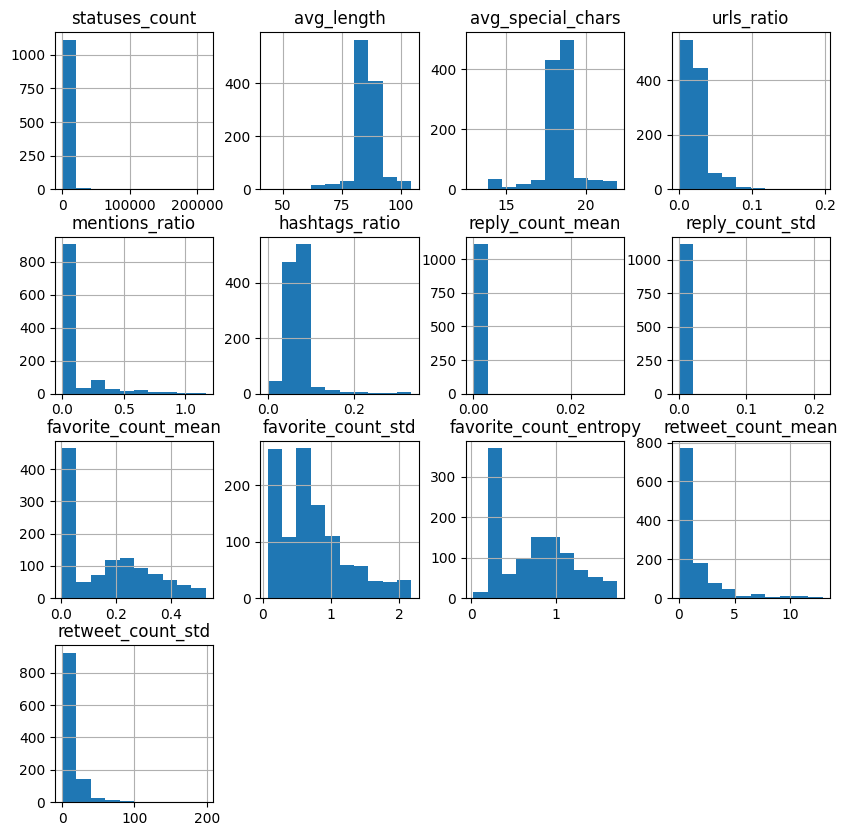

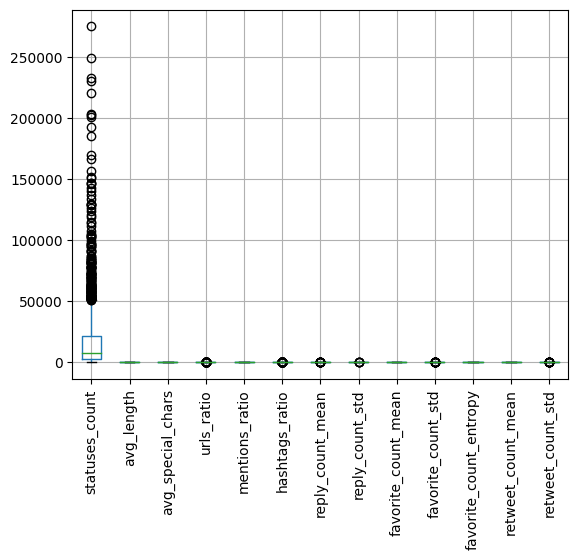

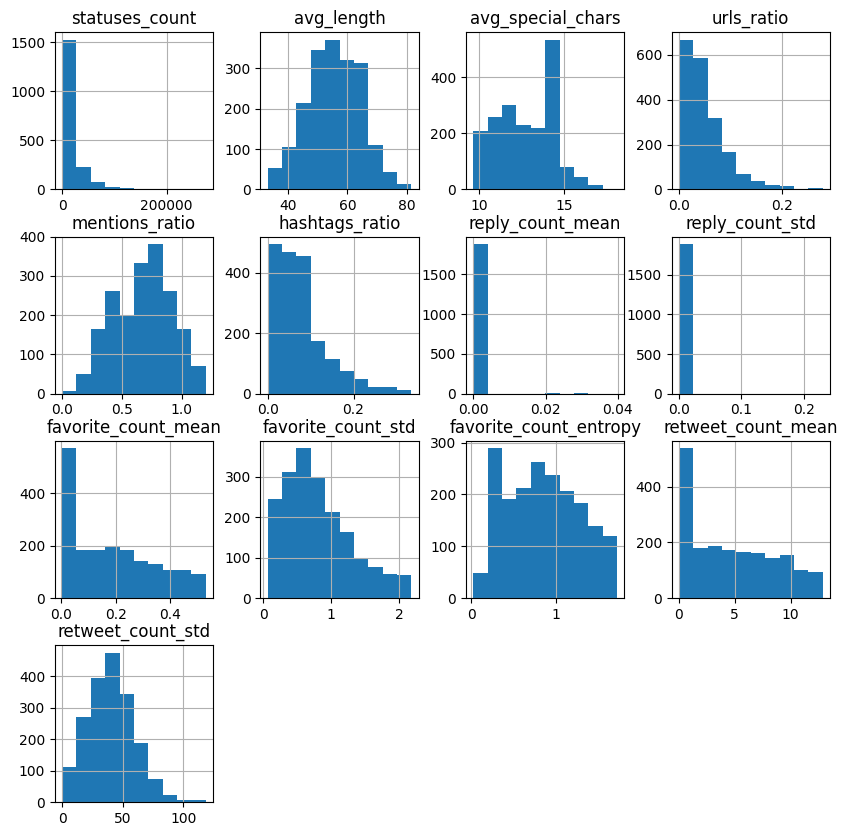

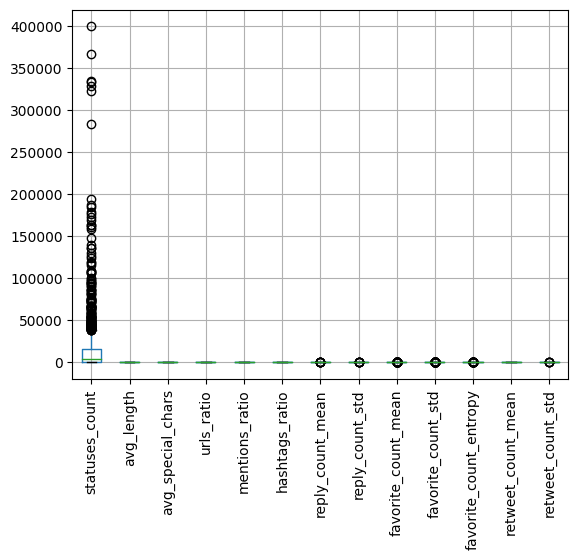

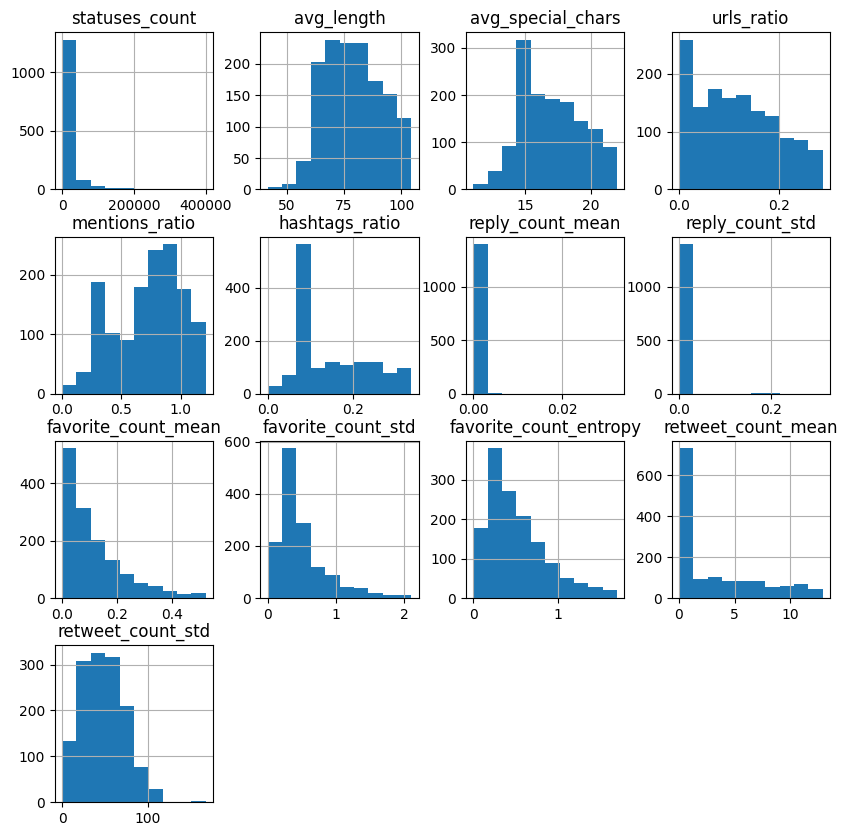

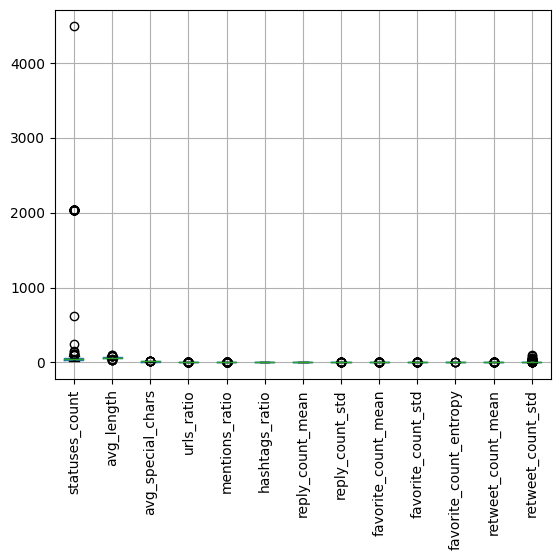

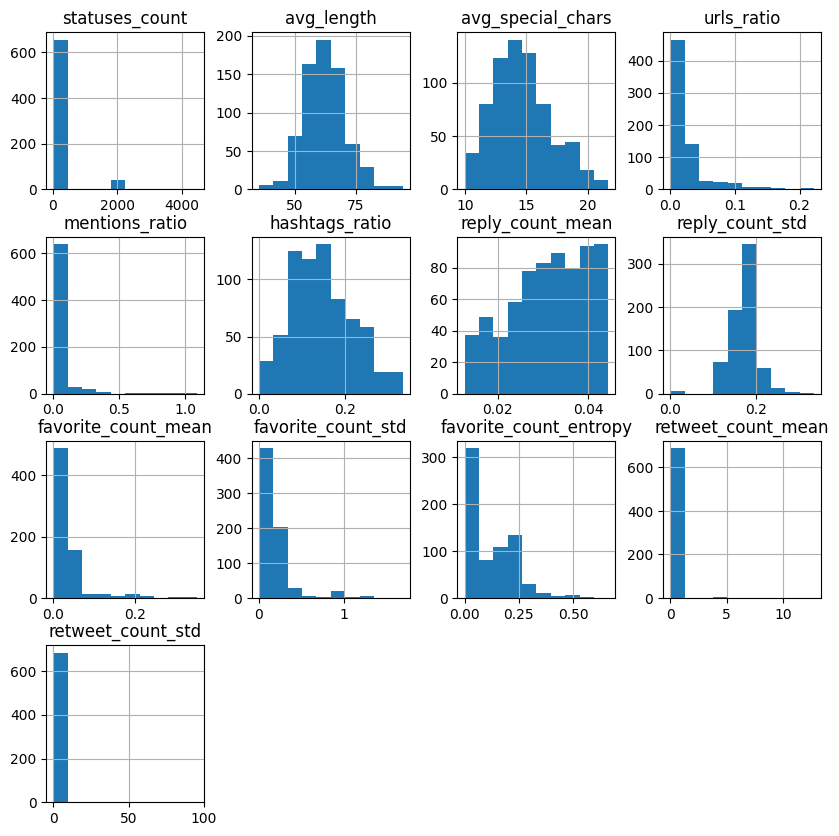

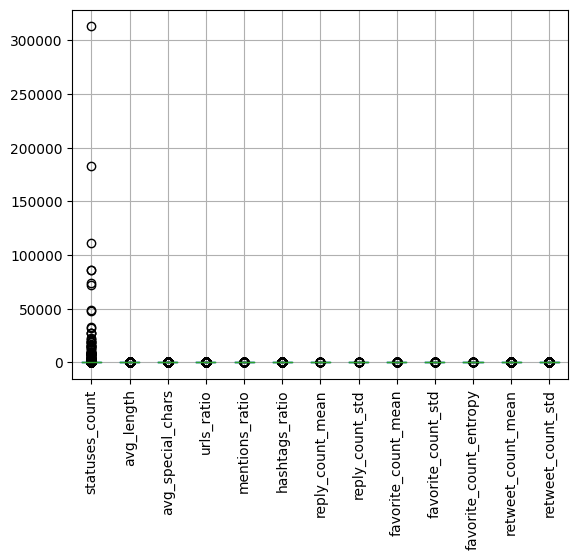

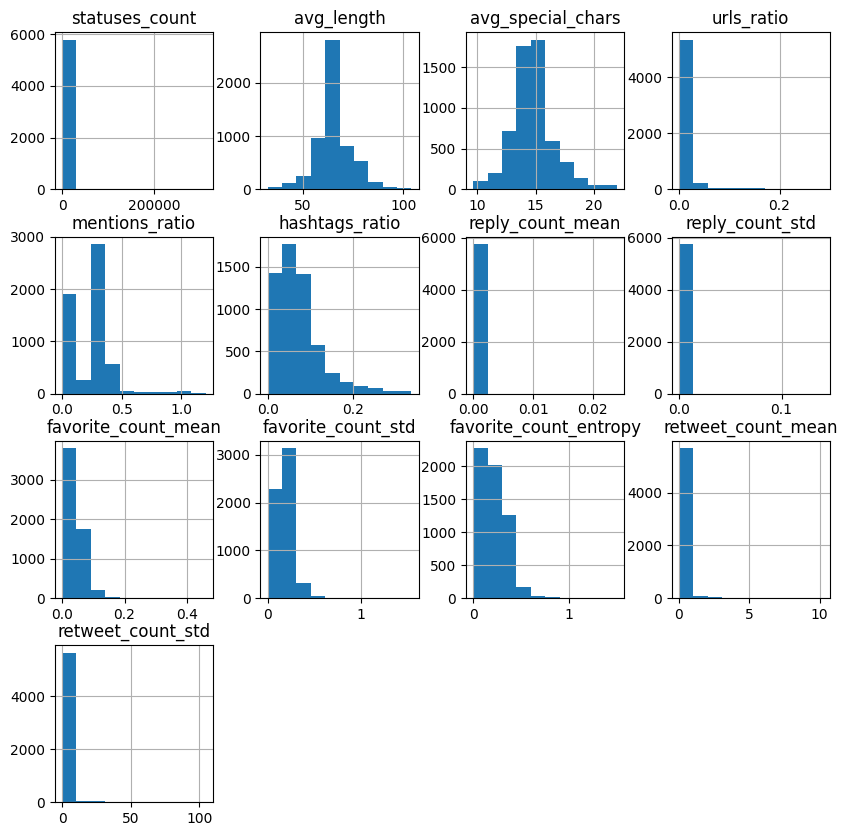

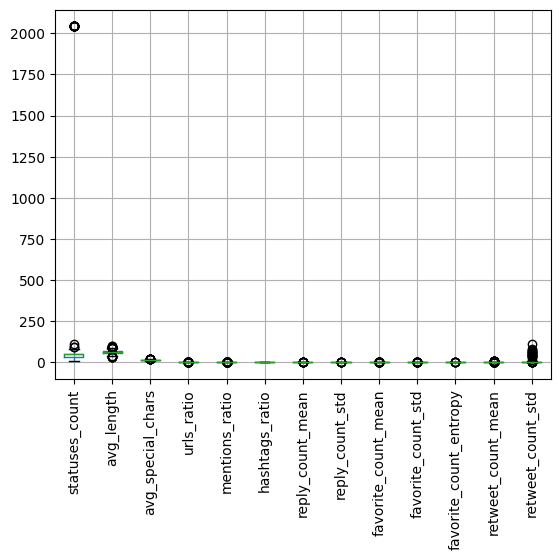

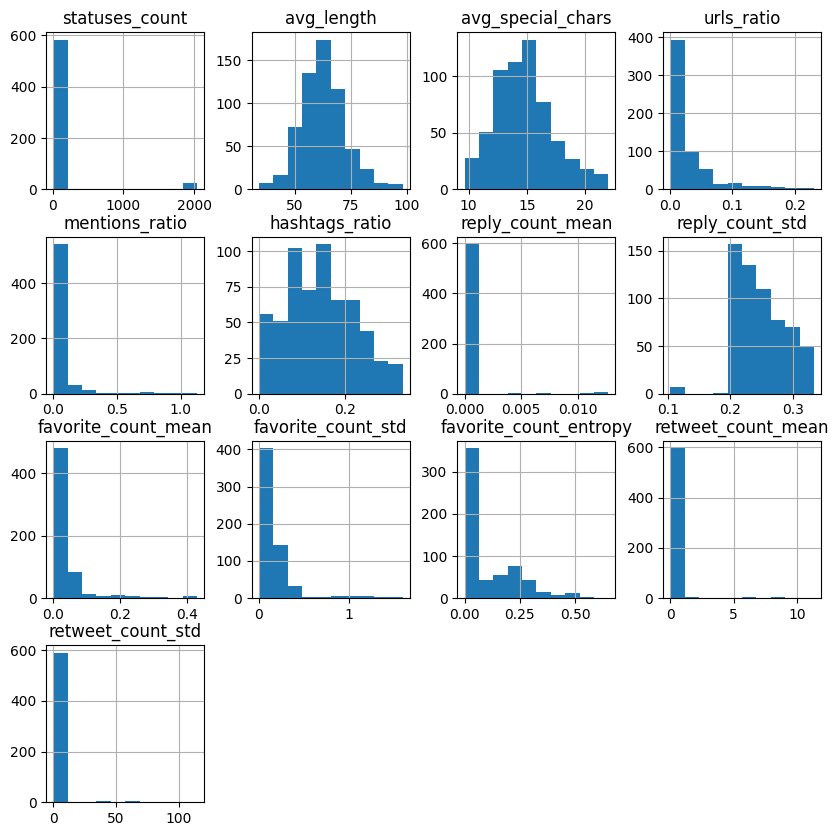

In [23]:
plot_numerical_features_clusters(df_num, kmeans.labels_, selected_k)

Plotting the scatter plot of each pair of numerical features, coloring out the points with respect the cluster number of each sample

statuses_count - avg_length


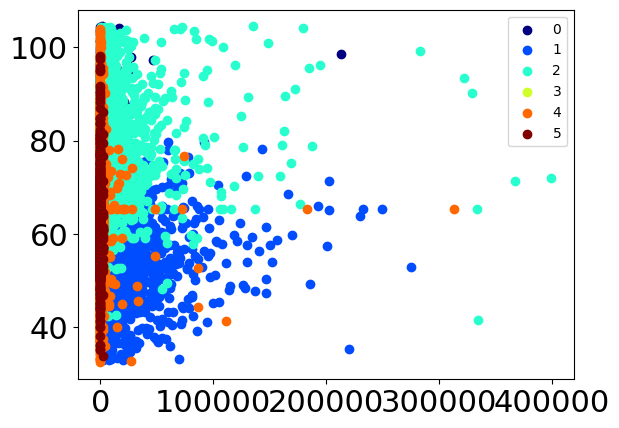

statuses_count - avg_special_chars


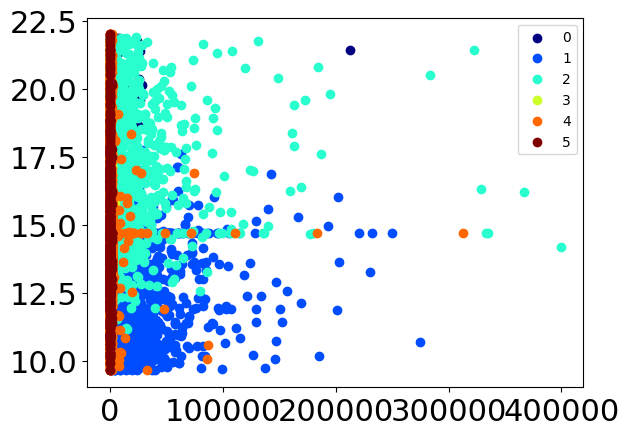

statuses_count - urls_ratio


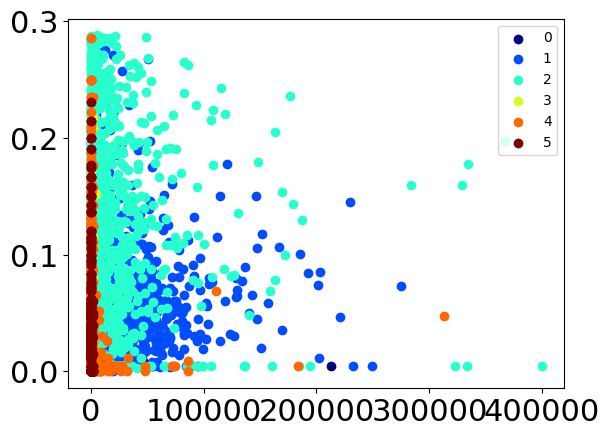

statuses_count - mentions_ratio


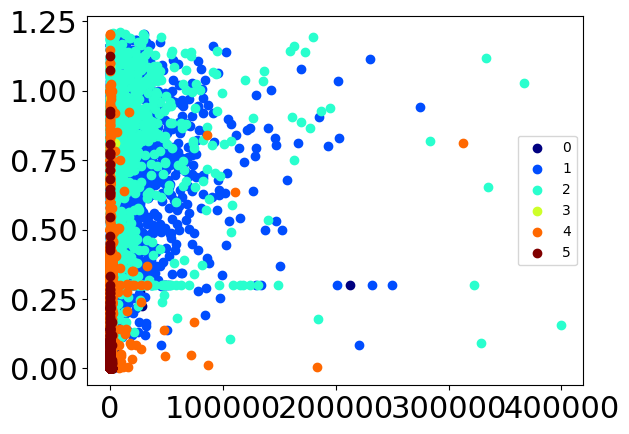

statuses_count - hashtags_ratio


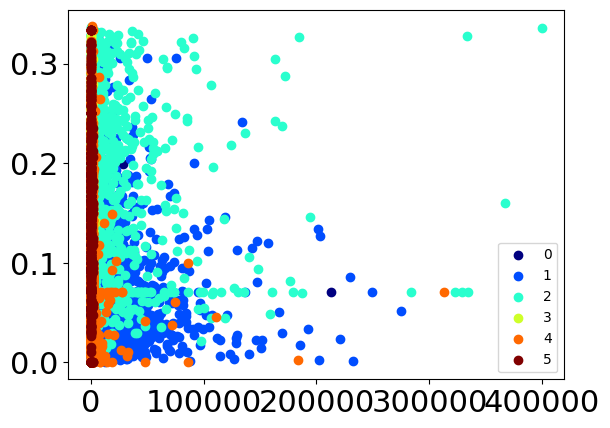

statuses_count - reply_count_mean


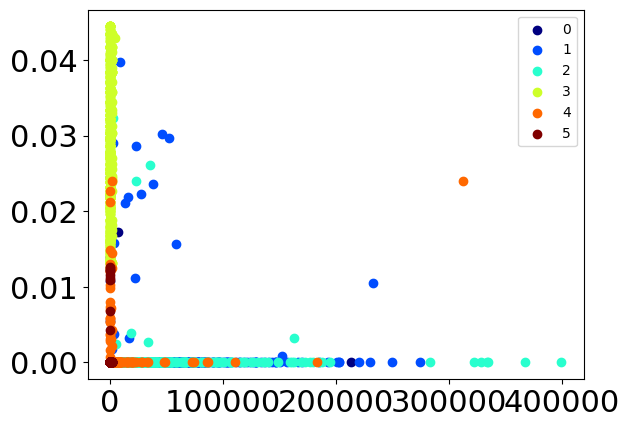

statuses_count - reply_count_std


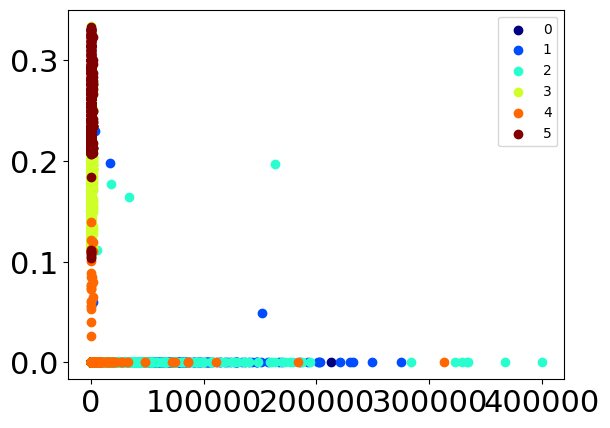

statuses_count - favorite_count_mean


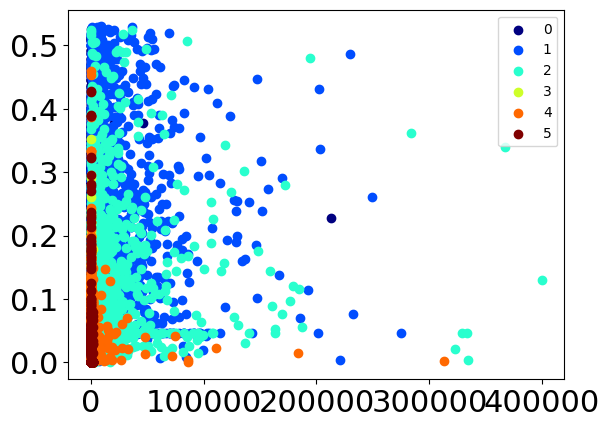

statuses_count - favorite_count_std


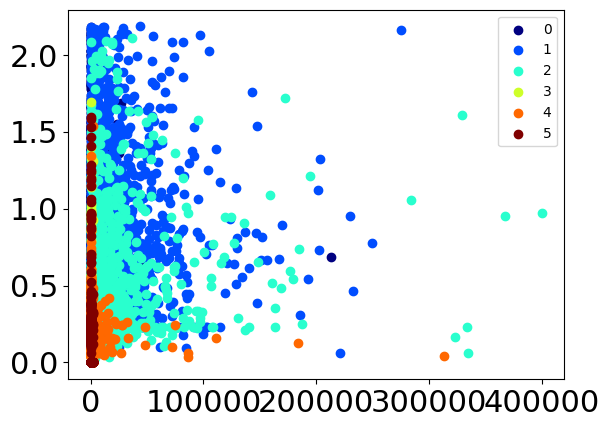

statuses_count - favorite_count_entropy


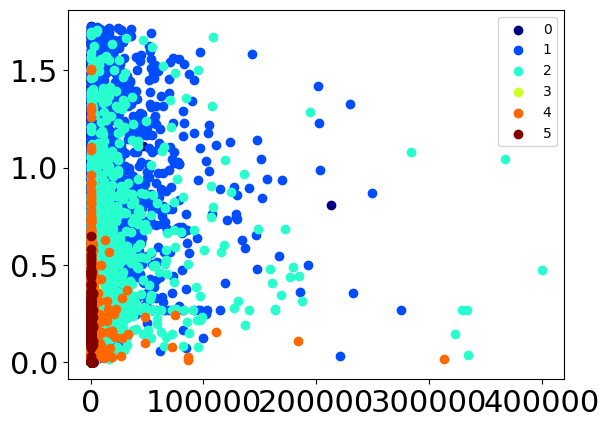

statuses_count - retweet_count_mean


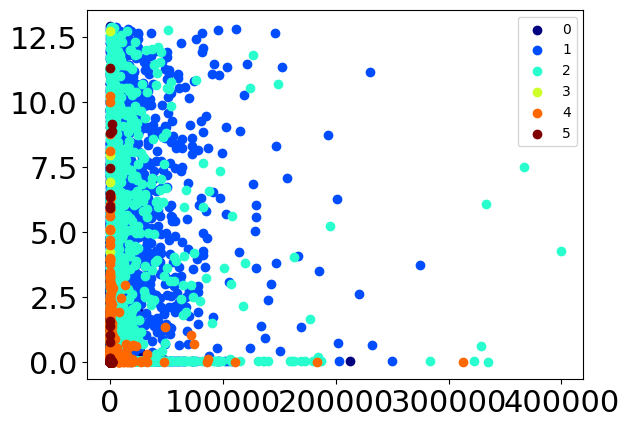

statuses_count - retweet_count_std


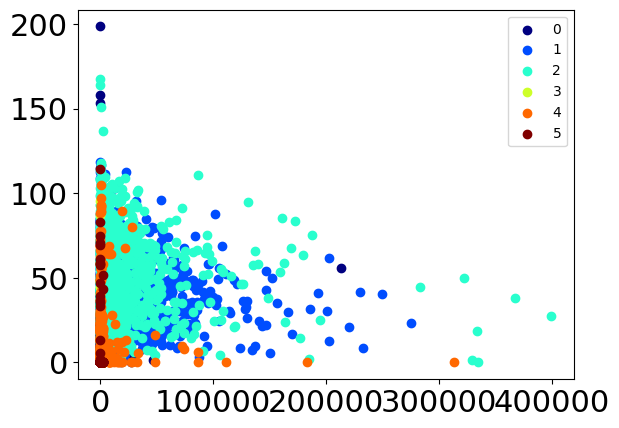

avg_length - avg_special_chars


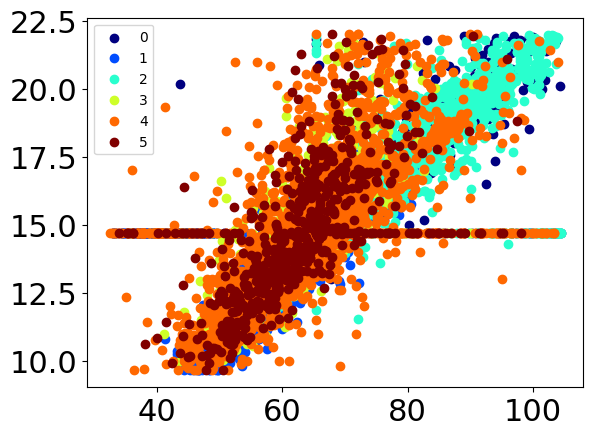

avg_length - urls_ratio


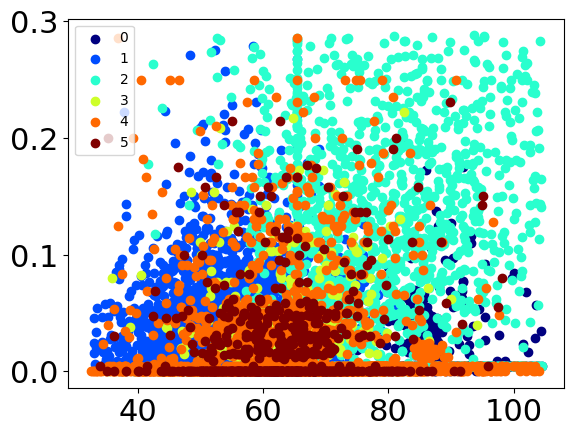

avg_length - mentions_ratio


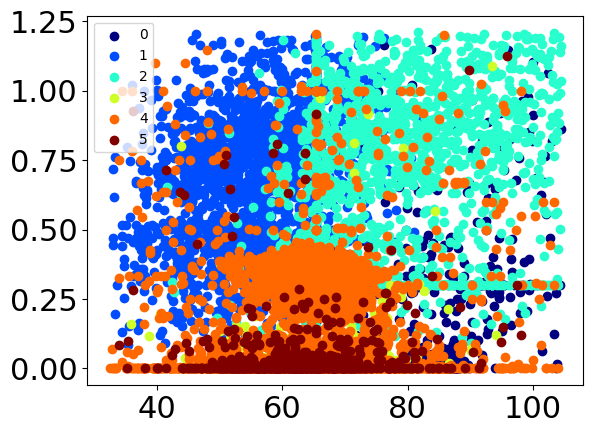

avg_length - hashtags_ratio


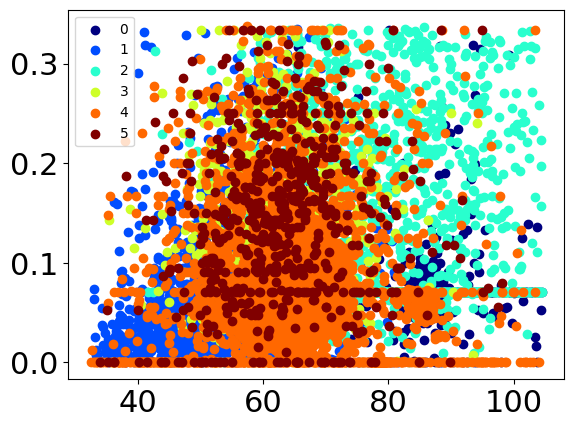

avg_length - reply_count_mean


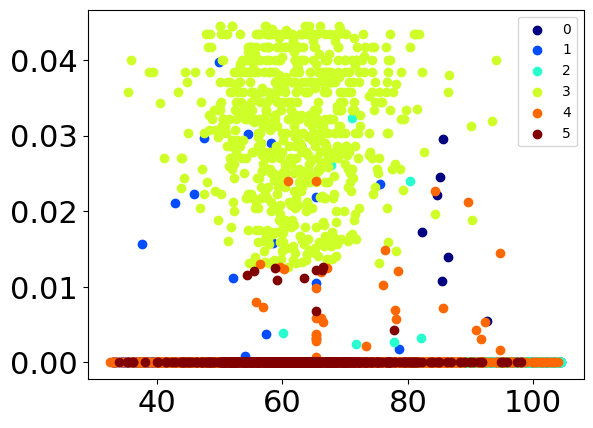

avg_length - reply_count_std


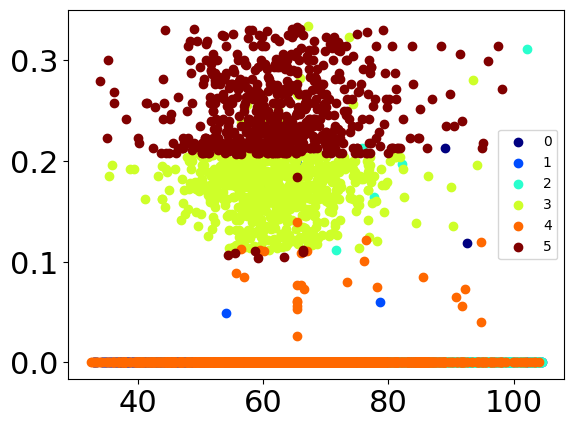

avg_length - favorite_count_mean


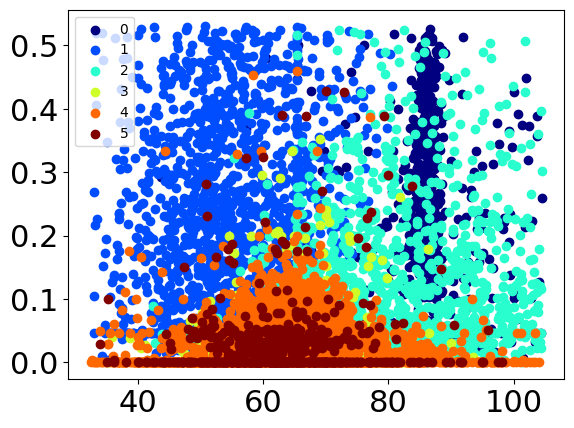

avg_length - favorite_count_std


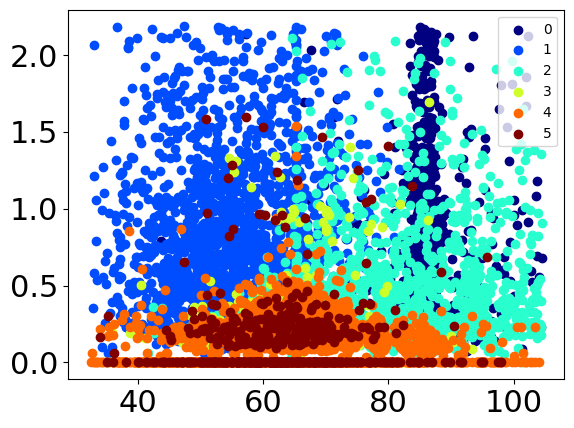

avg_length - favorite_count_entropy


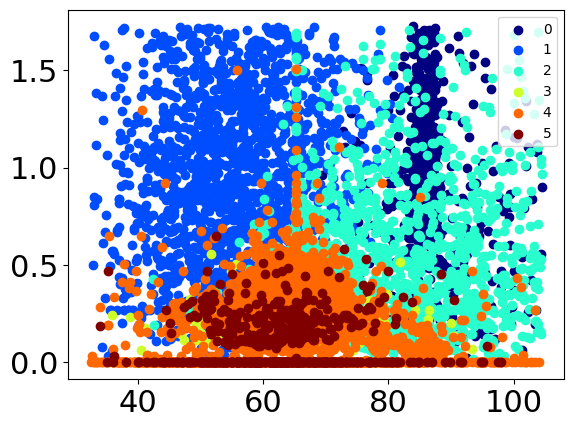

avg_length - retweet_count_mean


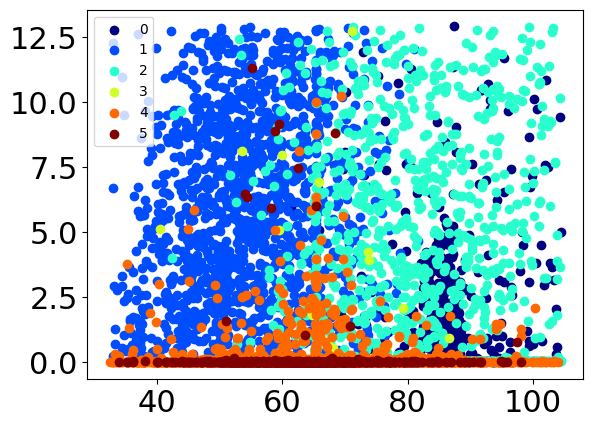

avg_length - retweet_count_std


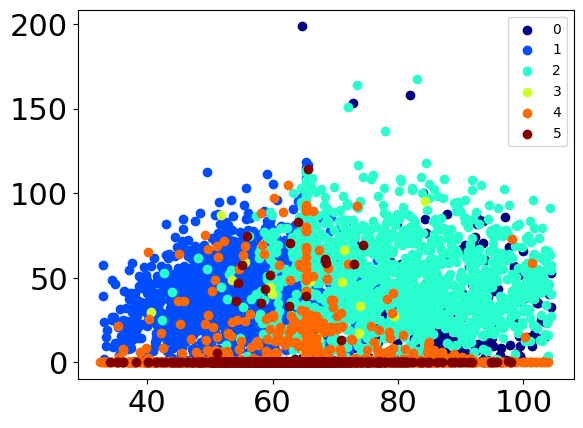

avg_special_chars - urls_ratio


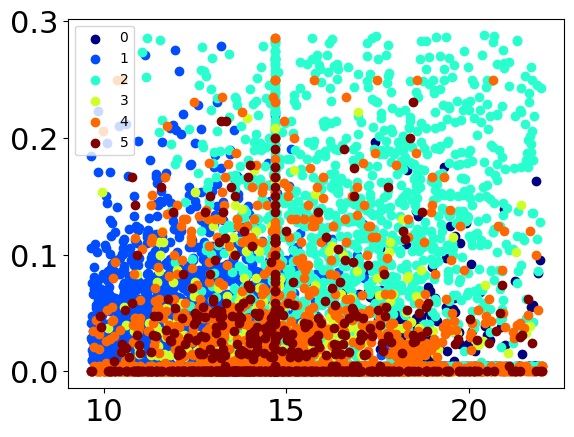

avg_special_chars - mentions_ratio


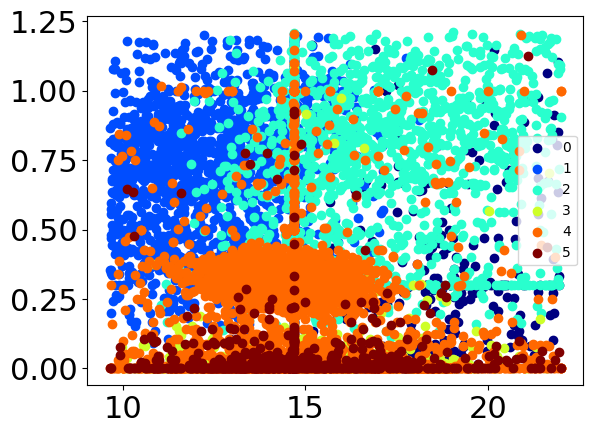

avg_special_chars - hashtags_ratio


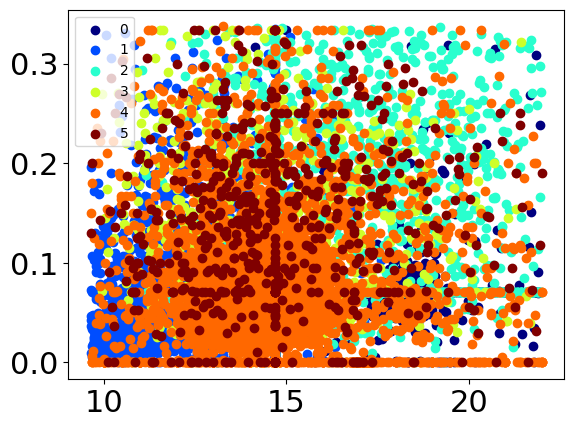

avg_special_chars - reply_count_mean


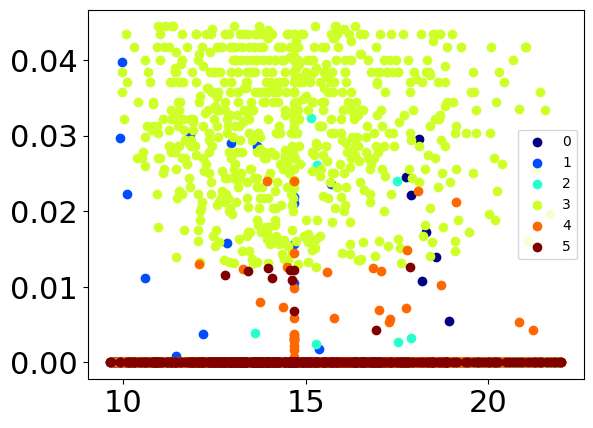

avg_special_chars - reply_count_std


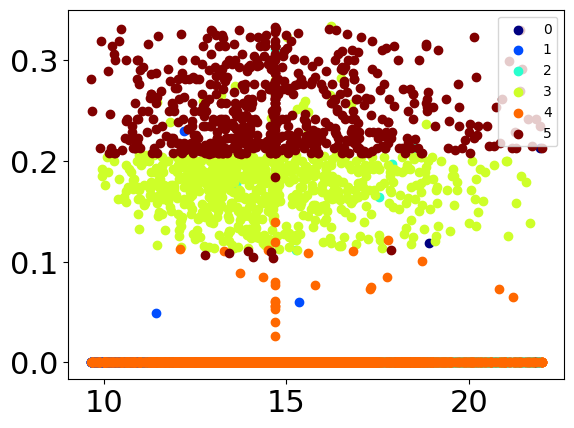

avg_special_chars - favorite_count_mean


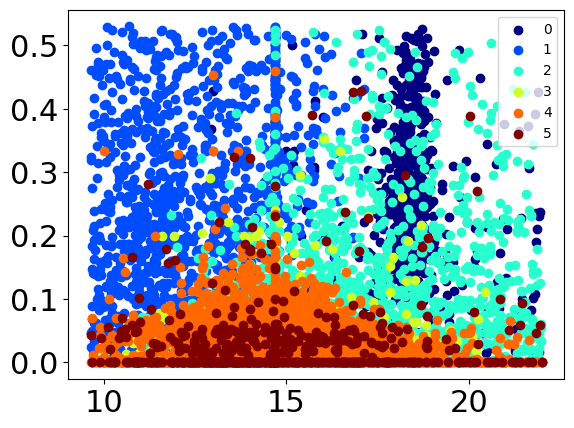

avg_special_chars - favorite_count_std


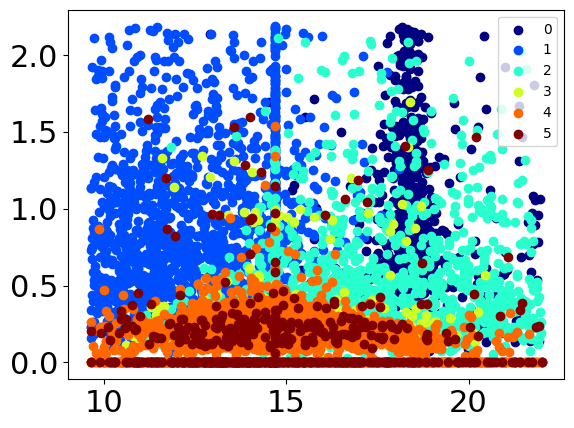

avg_special_chars - favorite_count_entropy


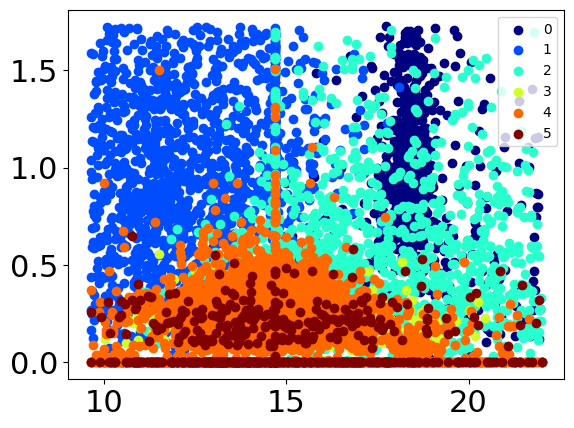

avg_special_chars - retweet_count_mean


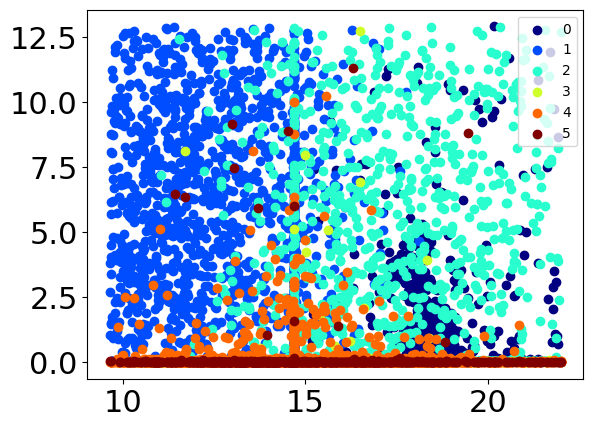

avg_special_chars - retweet_count_std


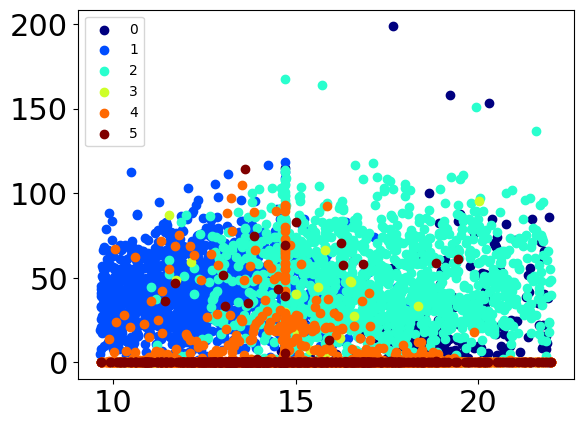

urls_ratio - mentions_ratio


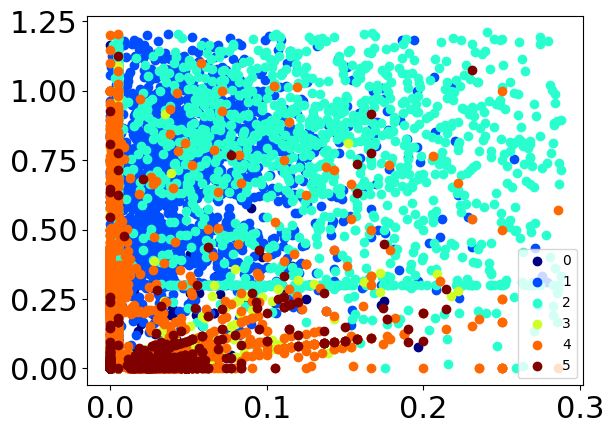

urls_ratio - hashtags_ratio


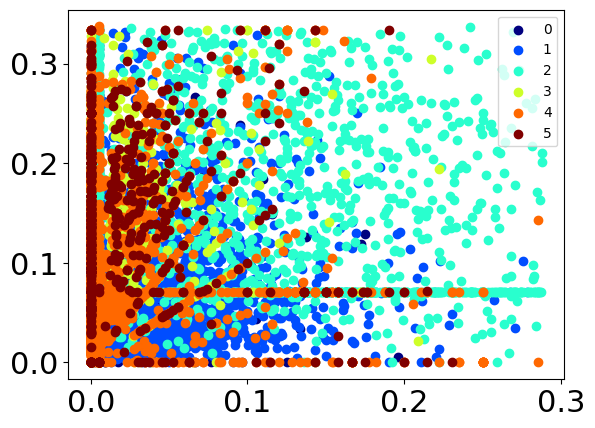

urls_ratio - reply_count_mean


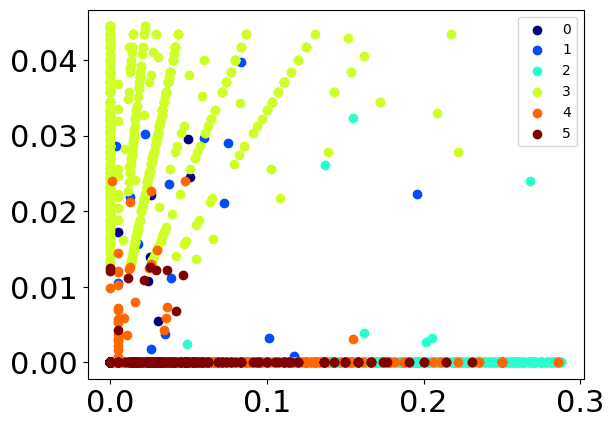

urls_ratio - reply_count_std


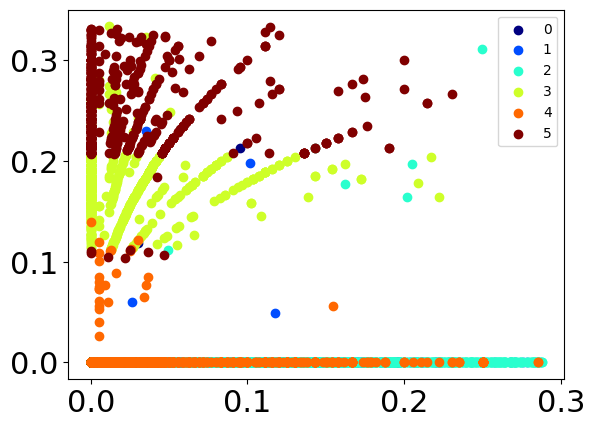

urls_ratio - favorite_count_mean


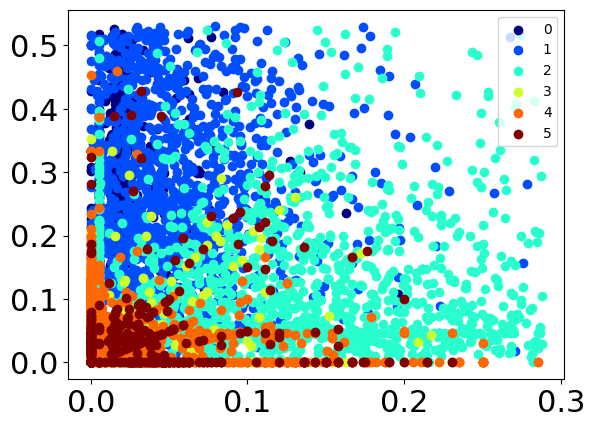

urls_ratio - favorite_count_std


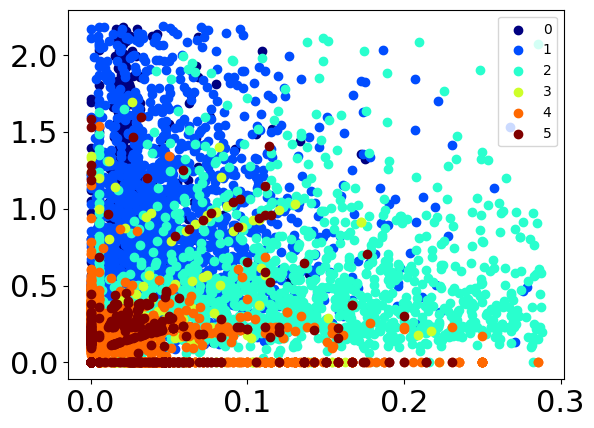

urls_ratio - favorite_count_entropy


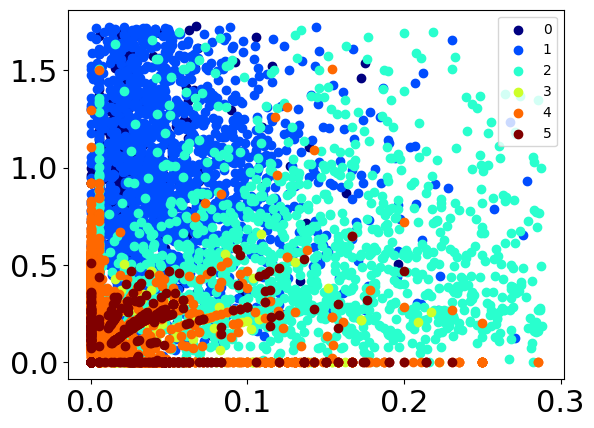

urls_ratio - retweet_count_mean


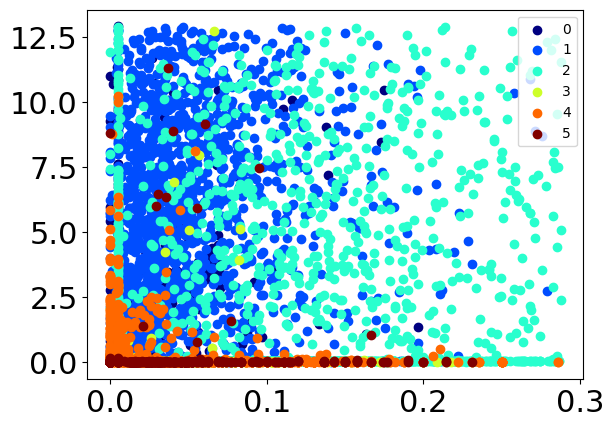

urls_ratio - retweet_count_std


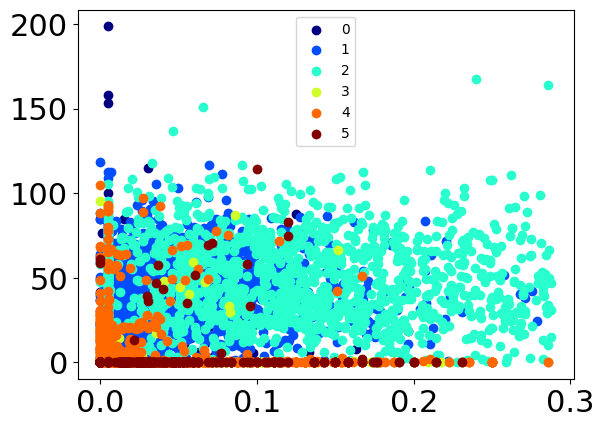

mentions_ratio - hashtags_ratio


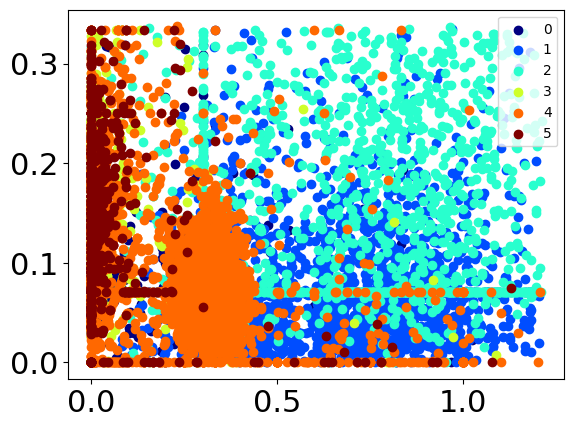

mentions_ratio - reply_count_mean


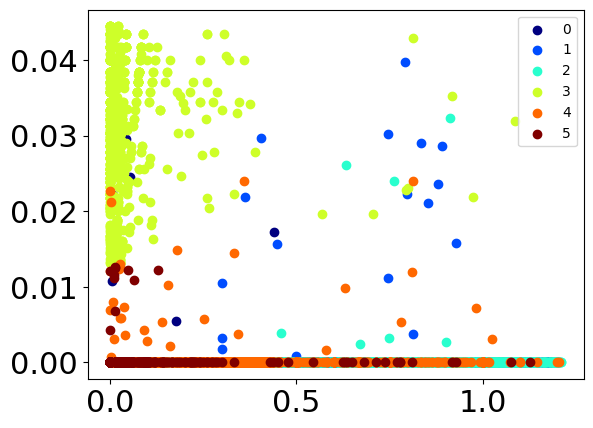

mentions_ratio - reply_count_std


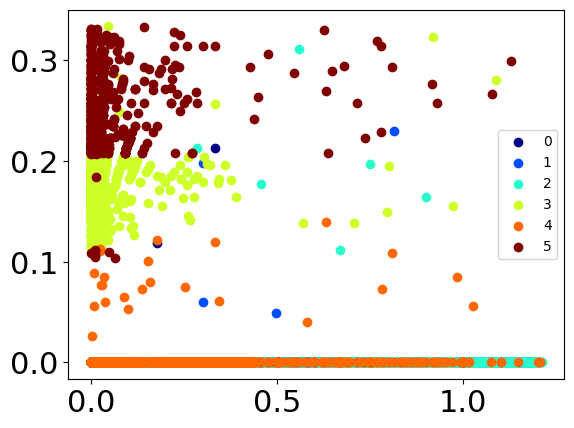

mentions_ratio - favorite_count_mean


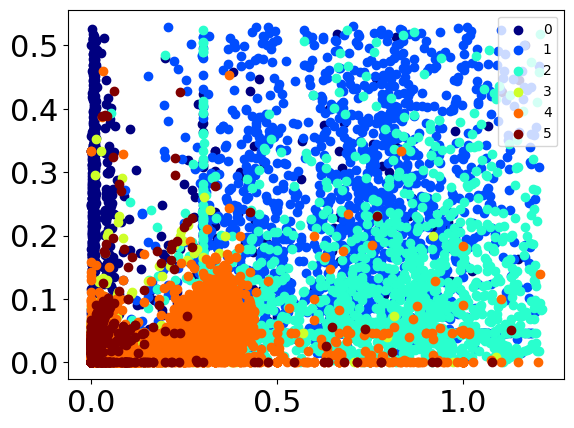

mentions_ratio - favorite_count_std


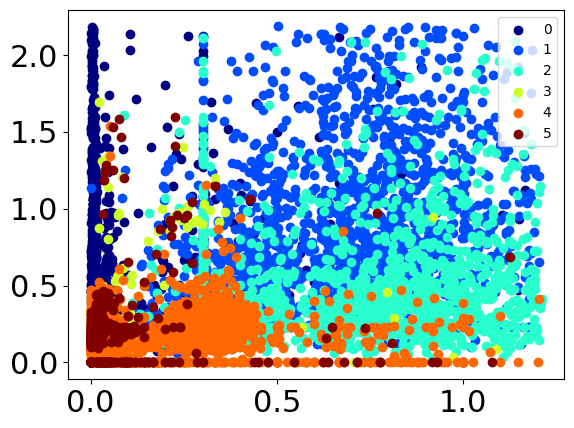

mentions_ratio - favorite_count_entropy


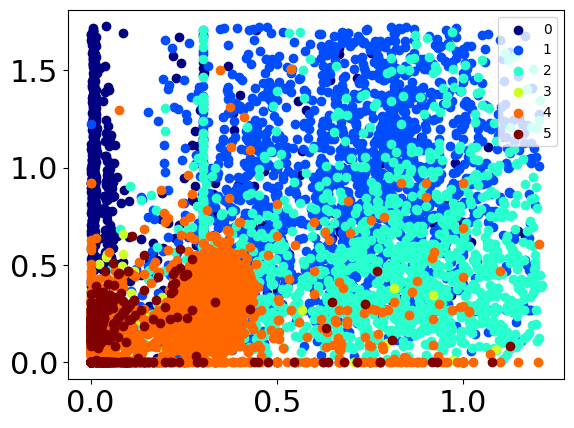

mentions_ratio - retweet_count_mean


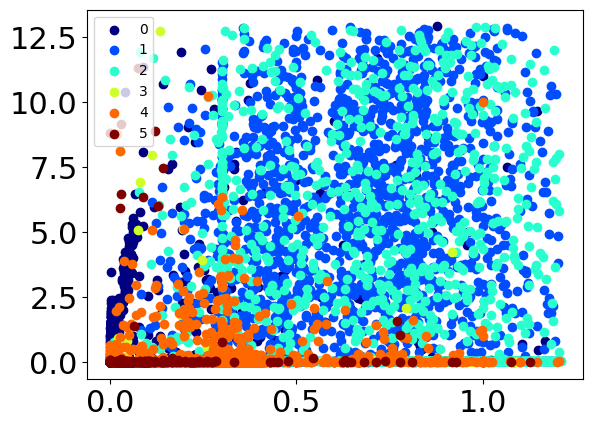

mentions_ratio - retweet_count_std


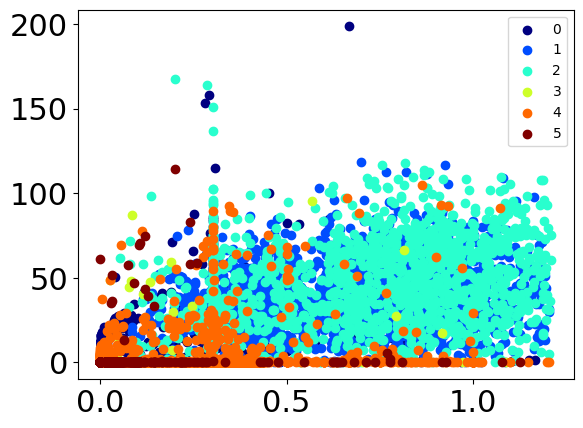

hashtags_ratio - reply_count_mean


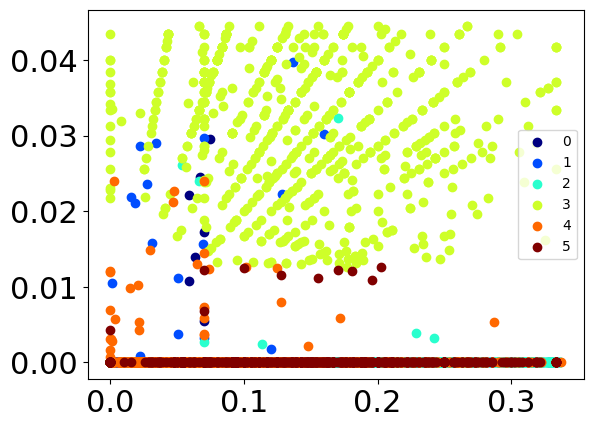

hashtags_ratio - reply_count_std


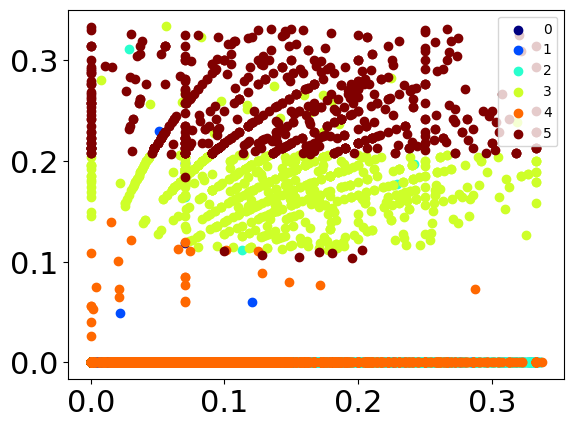

hashtags_ratio - favorite_count_mean


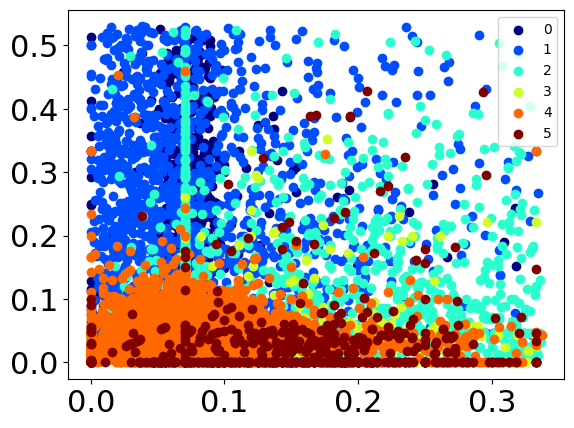

hashtags_ratio - favorite_count_std


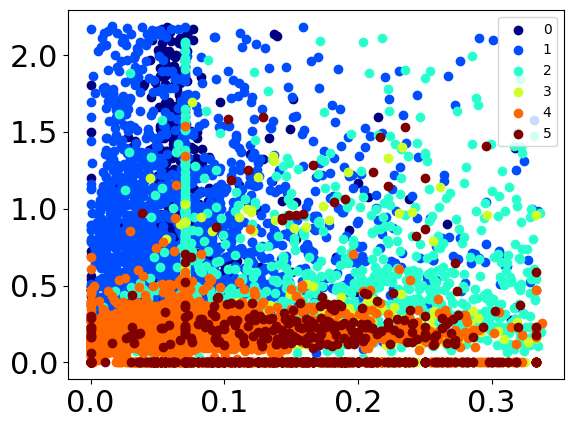

hashtags_ratio - favorite_count_entropy


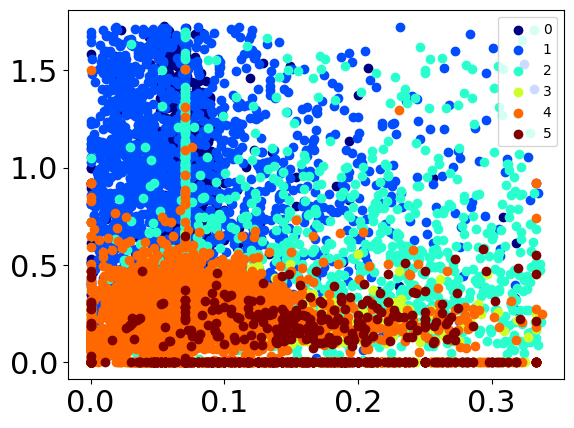

hashtags_ratio - retweet_count_mean


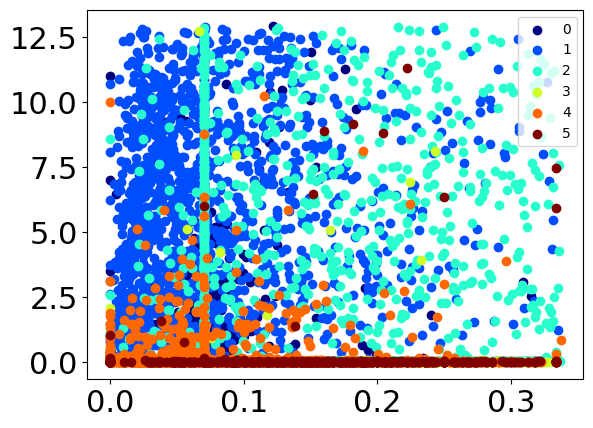

hashtags_ratio - retweet_count_std


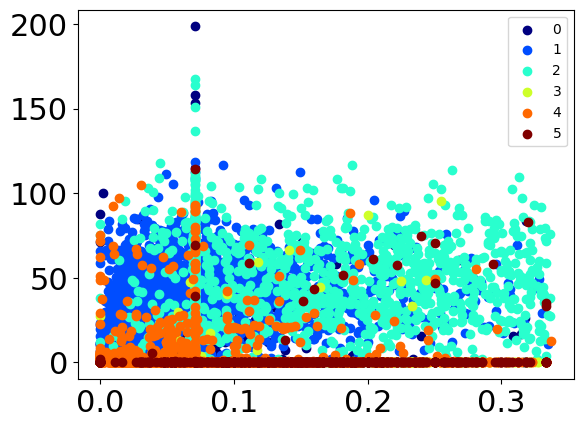

reply_count_mean - reply_count_std


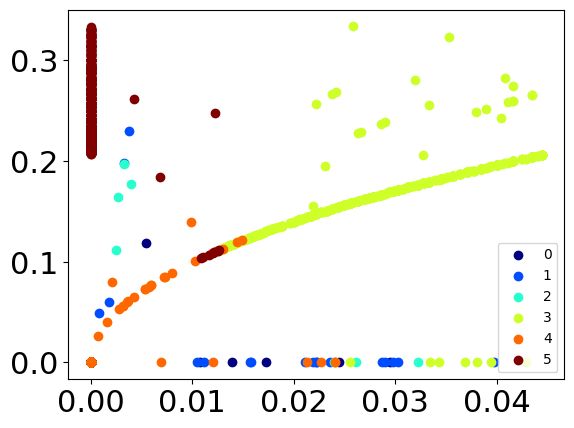

reply_count_mean - favorite_count_mean


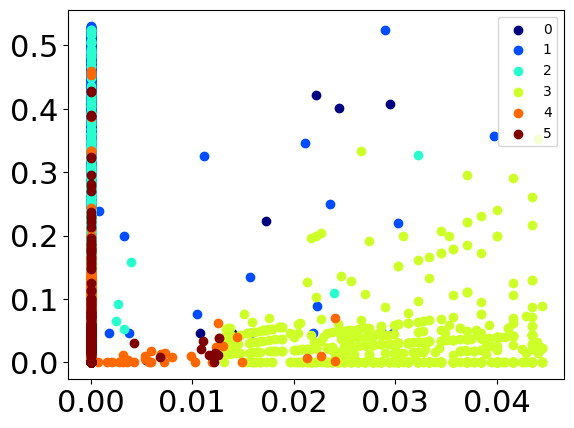

reply_count_mean - favorite_count_std


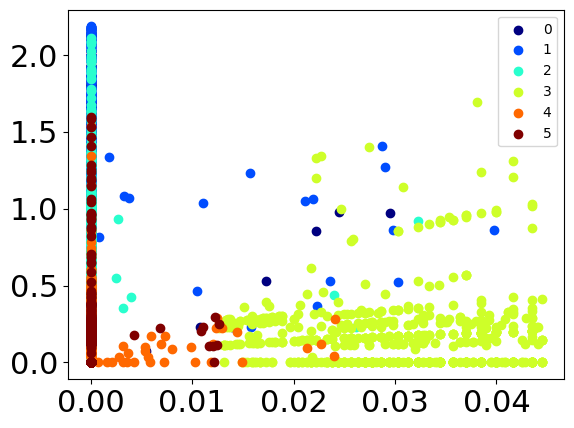

reply_count_mean - favorite_count_entropy


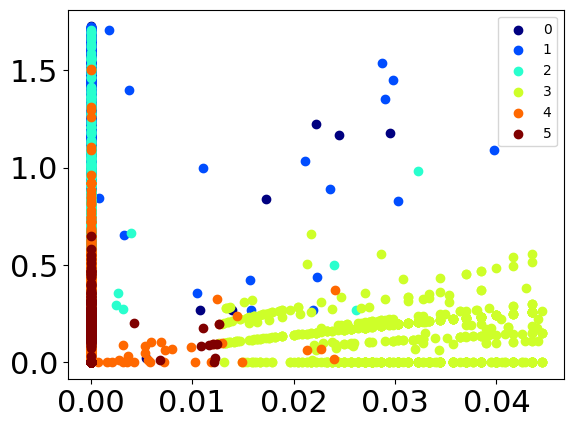

reply_count_mean - retweet_count_mean


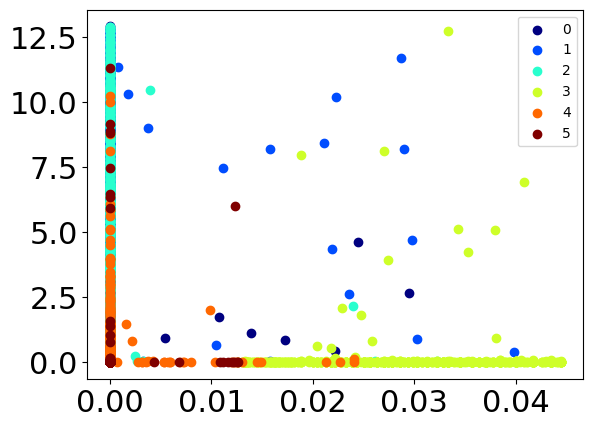

reply_count_mean - retweet_count_std


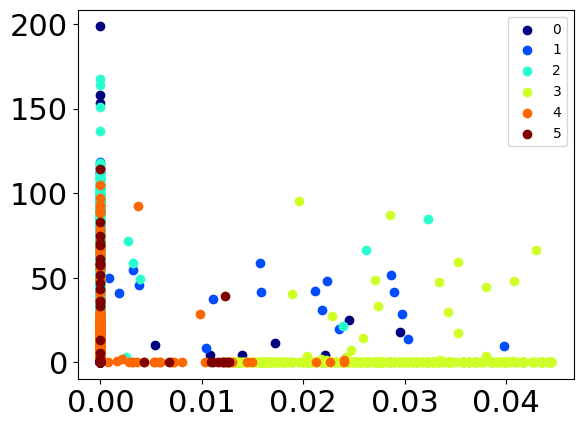

reply_count_std - favorite_count_mean


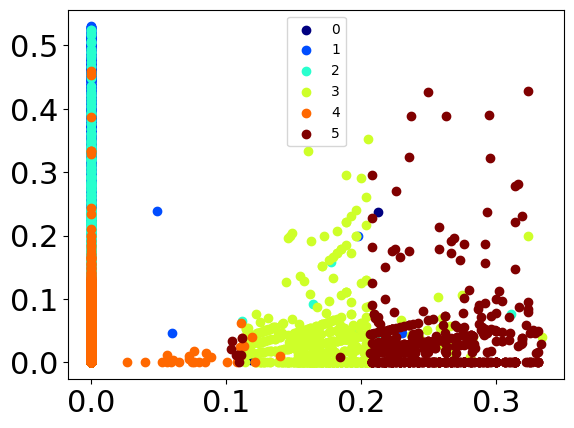

reply_count_std - favorite_count_std


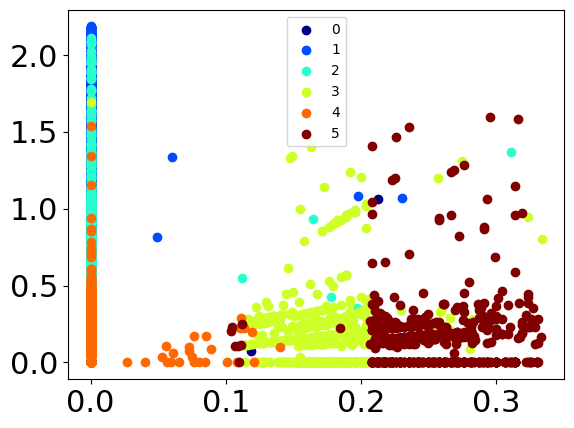

reply_count_std - favorite_count_entropy


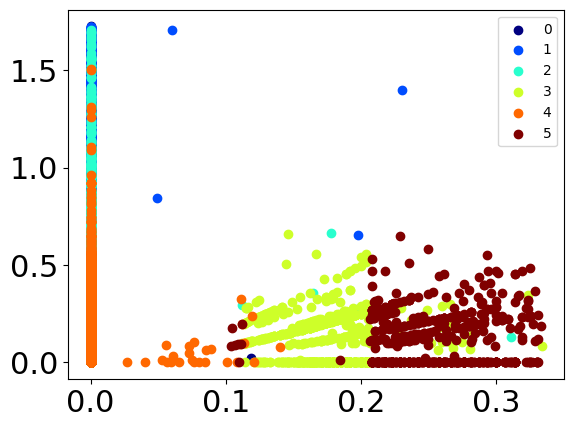

reply_count_std - retweet_count_mean


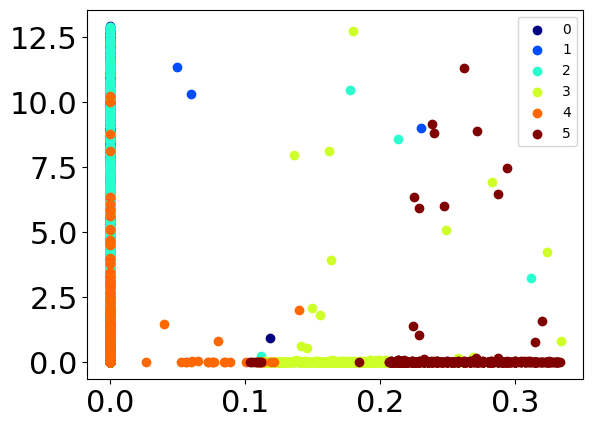

reply_count_std - retweet_count_std


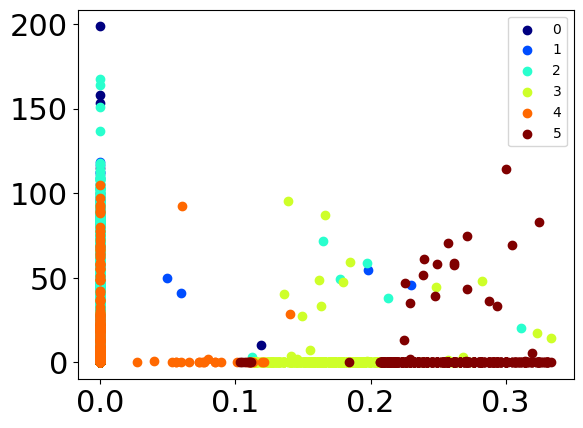

favorite_count_mean - favorite_count_std


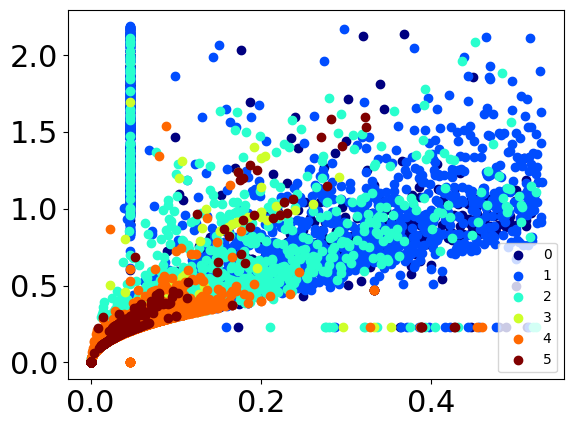

favorite_count_mean - favorite_count_entropy


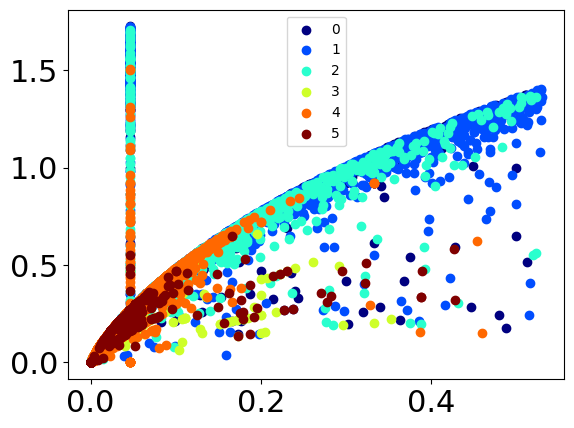

favorite_count_mean - retweet_count_mean


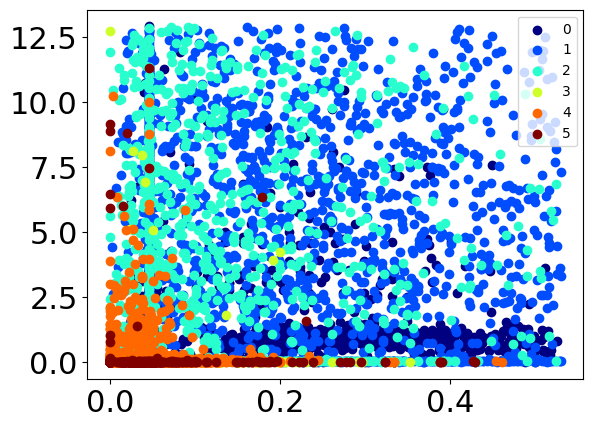

favorite_count_mean - retweet_count_std


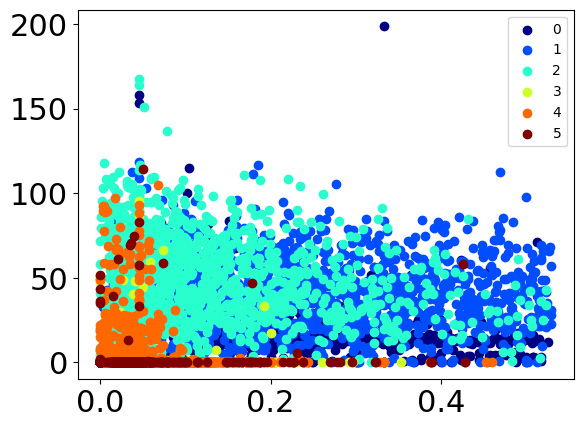

favorite_count_std - favorite_count_entropy


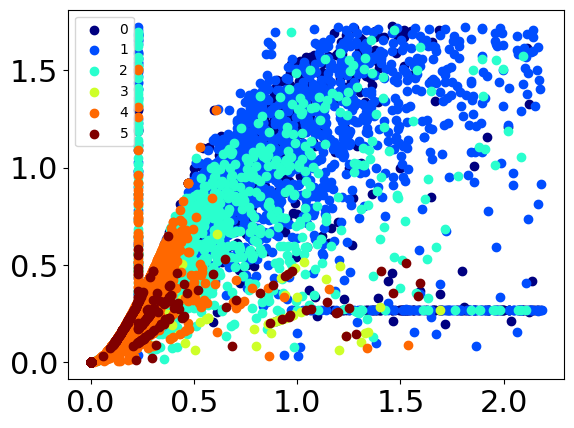

favorite_count_std - retweet_count_mean


favorite_count_std - retweet_count_std


favorite_count_entropy - retweet_count_mean


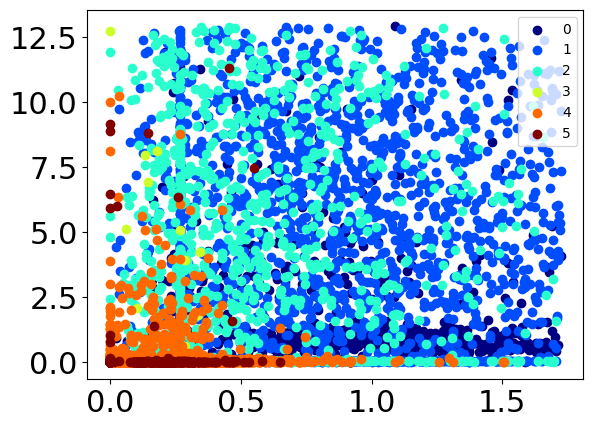

favorite_count_entropy - retweet_count_std


retweet_count_mean - retweet_count_std


In [24]:
scatter_features_clusters(df_num, kmeans.labels_)

### PCA
Apply PCA to visualize the scatter plot distribution of the clustered data

In [25]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

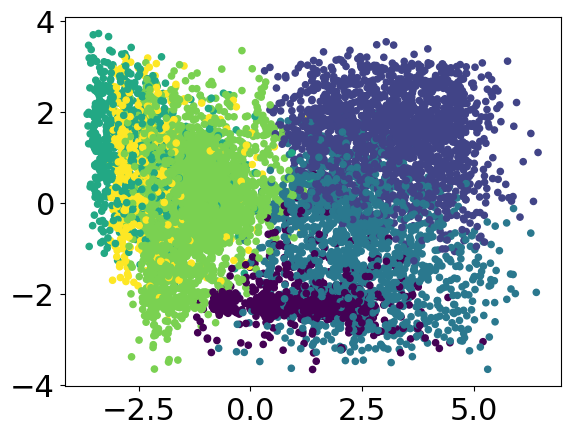

In [26]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.savefig("images/clustering/kmeans_pca.png")
plt.show()

### Evaluation KMeans

Print the SSE, Silouette and Separation of the method selected out.

In [27]:
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))

SSE 65379.69788401858
Silhouette 0.3501214608042284
Separation 1.4086390073004749
